Setup

In [19]:
%pip install pandas
%pip install ipywidgets

import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


# Demographic components

[Source](https://www.data.gv.at/katalog/en/dataset/55ec8468-7501-461a-8f88-d832c12eb788#additional-info)

Table description:
- NUTS - bundesland
- DISTRICT_CODE | Gemeindebezirkskennzahl (Schema: 9BBZZ, BB=Nummer Bezirk, ZZ=00)
- SUB_DISTRICT_CODE | Zählbezirkskennzahl gemäß Stadt Wien (Schema: 9BBZZ, 9=Kennzeichnung Wien, BB=Nummer Bezirk, ZZ=Nummer Zählbezirk, ZZ=99 bei fehlender Zählbezirkskennzeichnung)
- NAT_CHANGE | Geburtenbilanz (Geburten minus Sterbefälle) (en. natural population change)
- MIG_INT_NET | Binnenwanderungsbilanz (Zu- minus Abwanderungsbewegungen aus einem Bundesland in ein anderes) (en. internal migration)
- MIG_EXT_NET | Außenwanderungsbilanz (Zu- minus Abwanderungsbewegungen aus einem Land in ein anderes über internationale Grenzen) (en. external/international migration)
- MIG_MOV_NET | Intra-urbane Wanderungsbilanz (Zu- minus Abwanderungsbewegungen von einem Wiener Gemeindebezirk in einen anderen) (en. intra-urban move)
- POP_CHANGE | Bevölkerungsveränderung (absolut) (en. population change)

In [20]:
demographic_components_df = pd.read_csv("https://www.wien.gv.at/gogv/l9ogdviebezbizpopdem2002f", delimiter=";", skiprows=1)
display(demographic_components_df.head())
display(demographic_components_df.describe())

,NUTS,DISTRICT_CODE,SUB_DISTRICT_CODE,REF_YEAR,REF_DATE,NAT_CHANGE,MIG_INT_NET,MIG_EXT_NET,MIG_MOV_NET,POP_CHANGE
0,AT13,90000.0,90000.0,2002.0,2002.0,-488.000,1.890,19.598,-,21.000
1,AT13,90000.0,90000.0,2003.0,2003.0,-494.000,-1.546,18.640,-,16.600
2,AT13,90000.0,90000.0,2004.0,2004.0,873.000,-3.879,23.537,-,20.531
3,AT13,90000.0,90000.0,2005.0,2005.0,713.000,-3.226,20.407,-,17.894
4,AT13,90000.0,90000.0,2006.0,2006.0,1.316,-2.128,8.900,-,8.088


,DISTRICT_CODE,SUB_DISTRICT_CODE,REF_YEAR,REF_DATE,NAT_CHANGE,MIG_INT_NET,MIG_EXT_NET,POP_CHANGE
count,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000
mean,91150.000000,91150.000000,2012.000000,2012.000000,87.850476,-36.878560,785.145790,656.489974
std,692.906404,692.906404,6.061317,6.061317,215.159228,379.338233,2301.731519,2511.188241
min,90000.000000,90000.000000,2002.000000,2002.000000,-494.000000,-2403.000000,-163.000000,-838.000000
25%,90575.000000,90575.000000,2007.000000,2007.000000,-15.250000,-252.250000,267.000000,1.654250
50%,91150.000000,91150.000000,2012.000000,2012.000000,56.500000,11.000000,526.000000,226.500000
75%,91725.000000,91725.000000,2017.000000,2017.000000,202.000000,216.250000,873.000000,725.250000
max,92300.000000,92300.000000,2022.000000,2022.000000,1273.000000,1323.000000,49097.000000,50748.000000


Clean up:
- Rows exist without a district as well as a 0. district which doesn't exist in Vienna.
- Drop `NUTS` and `DISTRICT_CODE` since we're only working with Austria
- Drop `REF_DATE` since it stores the same value as `REF_YEAR`


In [21]:
demographic_components_df = demographic_components_df[demographic_components_df['SUB_DISTRICT_CODE'] != 90000]
demographic_components_df = demographic_components_df.dropna(subset=['SUB_DISTRICT_CODE'])
demographic_components_df['SUB_DISTRICT_CODE'] = demographic_components_df['SUB_DISTRICT_CODE'].astype(int)
demographic_components_df['SUB_DISTRICT_CODE'] = demographic_components_df['SUB_DISTRICT_CODE'].astype(str).str[1:-2].astype(int)

demographic_components_df['REF_YEAR'] = demographic_components_df['REF_YEAR'].astype(int)

demographic_components_df = demographic_components_df.drop('NUTS', axis=1)
demographic_components_df = demographic_components_df.drop('DISTRICT_CODE', axis=1)
demographic_components_df = demographic_components_df.drop('REF_DATE', axis=1)
display(demographic_components_df)

,SUB_DISTRICT_CODE,REF_YEAR,NAT_CHANGE,MIG_INT_NET,MIG_EXT_NET,MIG_MOV_NET,POP_CHANGE
21,1,2002,-65.0,85.0,40.0,-150,-90.0
22,1,2003,-49.0,31.0,123.0,-268,-163.0
23,1,2004,-65.0,2.0,95.0,-151,-119.0
24,1,2005,-81.0,25.0,127.0,-133,-62.0
25,1,2006,-61.0,-13.0,220.0,-294,-148.0
...,...,...,...,...,...,...,...
499,23,2018,-10.0,-619.0,193.0,2890,2454.0
500,23,2019,110.0,-409.0,334.0,4140,4175.0
501,23,2020,-85.0,-887.0,360.0,1978,1366.0
502,23,2021,-19.0,-678.0,420.0,3642,3365.0


In [22]:

def update_graph(year):
    model_population_change = demographic_components_df[demographic_components_df['REF_YEAR'] == year].groupby('SUB_DISTRICT_CODE')['POP_CHANGE'].sum()

    plt.figure(figsize=(10, 5))

    colors = ['red' if value < 0 else 'blue' for value in model_population_change]
    model_population_change.plot(kind='bar', color=colors)

    plt.xlabel('District')
    plt.ylabel('Population Change')
    plt.title(f'{year} Population Change in Viennese Districts')
    plt.xticks(rotation=45)

    min_value = demographic_components_df['POP_CHANGE'].min()
    max_value = demographic_components_df['POP_CHANGE'].max()
    plt.ylim(min_value * 1.1, max_value * 1.1)

    plt.show()

# Create a slider widget
year_slider = widgets.IntSlider(min=demographic_components_df['REF_YEAR'].min(), 
                                max=demographic_components_df['REF_YEAR'].max(), 
                                value=demographic_components_df['REF_YEAR'].min(), 
                                description='Year')

# Connect the slider to the update function
widgets.interactive(update_graph, year=year_slider)


interactive(children=(IntSlider(value=2002, description='Year', max=2022, min=2002), Output()), _dom_classes=(…

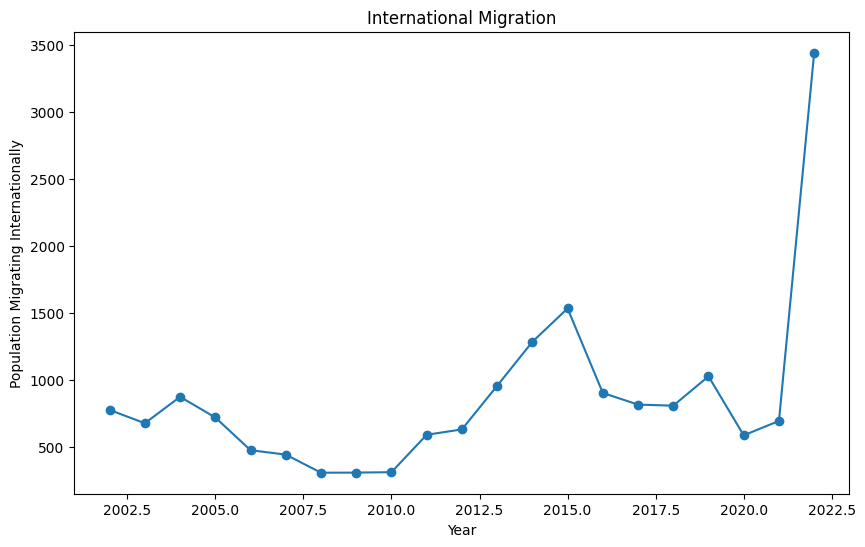

In [23]:
first_district_df = demographic_components_df[demographic_components_df['SUB_DISTRICT_CODE'] == 22]

# Plot the line graph
plt.figure(figsize=(10, 6))
plt.plot(first_district_df['REF_YEAR'], first_district_df['MIG_EXT_NET'], marker='o')

# Add title and labels
plt.title('International Migration')
plt.xlabel('Year')
plt.ylabel('Population Migrating Internationally')

# Show the plot
plt.show()

In [24]:


def update_graph(district):
    district_df = demographic_components_df[demographic_components_df['SUB_DISTRICT_CODE'] == district]

    # Plot the line graph
    plt.figure(figsize=(10, 6))
    plt.plot(district_df['REF_YEAR'], district_df['NAT_CHANGE'], marker='o')

    # Add title and labels
    plt.title('Net Births and Deaths')
    plt.xlabel('Year')
    plt.ylabel('Population Change from Natural Causes')

    min_y = demographic_components_df['NAT_CHANGE'].min()
    max_y = demographic_components_df['NAT_CHANGE'].max()
    plt.ylim(min_y * 1.1, max_y * 1.1)

    # Show the plot
    plt.show()

# Create a slider widget
district_slider = widgets.IntSlider(min=demographic_components_df['SUB_DISTRICT_CODE'].min(), 
                                max=demographic_components_df['SUB_DISTRICT_CODE'].max(), 
                                value=demographic_components_df['SUB_DISTRICT_CODE'].min(), 
                                description='District')

# Connect the slider to the update function

widgets.interactive(update_graph, district=district_slider)

interactive(children=(IntSlider(value=1, description='District', max=23, min=1), Output()), _dom_classes=('wid…